# What Are the Good Places to Open a Laundry or Dry Cleaning Service In Munich

## Introduction / Business problem

Munich is the capital and most populous city of Bavaria With a population of 1,558,395 inhabitants as of July 31, 2020, it is the third-largest city in Germany, after Berlin and Hamburg, and thus the largest which does not constitute its own state, as well as the 11th-largest city in the European Union. It is well knownn that Munich is a great destination for tourists due to the variety of activities, lakes, parks and beer gardens to museums, historical sites and massive stores, there's something for everyone who visits Munich. 

Based on what is mentioned above, it is obvious that there will be lots of hotels, Motels and Inns. Some of these places are providing laundry services and some of them don't. Four stars five starts hotels are providing laundry services but the costs are very high. Therefore, as part of this project we will analyse the areas around the hotels in Munich to find out the good places where to open or provide a laundry or dry cleaning services.

## Data / Methodology

For data supporting our analysis, first we are going to do our analysis based on the hotels in each borough in munich. Therefore we will be using [This](https://en.wikipedia.org/wiki/Population_growth_of_Munich) page to scrape the information related to boroughs in Munich. Once we fetch the required information, we will grab the coordinates for each borogh using the geocoders library. Once we have the required information, we will use Foursquare API to extract the hotels located in these boroughs. Once we fetch list of the hotels, we will check the available laundry or dry cleaning places within 300m from the hotel. Once we collect all the information, we will analyse and segment these hotels and check the propper places to open a laundry.

__Importing the Labraries__

In [392]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


__Getting to list of Bouroughs in Munich__

In [394]:
munich_boro = pd.read_html("https://en.wikipedia.org/wiki/Population_growth_of_Munich")

In [395]:
munich_boro = munich_boro[16]

In [396]:
munich_boro.head()

,Name,Area in km²,Inhabitant Count,Inhabitants per km²
0,Allach-Untermenzing,15.45,27730,1795
1,Altstadt-Lehel,3.16,18876,5973
2,Aubing-Lochhausen-Langwied,34.06,37857,1111
3,Au-Haidhausen,4.22,54382,12887
4,Berg am Laim,6.31,39009,6182


In [397]:
munich_boro = munich_boro[["Name","Area in km²","Inhabitant Count"]]

In [398]:
munich_boro.columns=["Borough","Area_Size","Inhabitant_Count"]

In [399]:
munich_boro = munich_boro.iloc[0:25,:]

In [400]:
munich_boro

,Borough,Area_Size,Inhabitant_Count
0,Allach-Untermenzing,15.45,27730
1,Altstadt-Lehel,3.16,18876
2,Aubing-Lochhausen-Langwied,34.06,37857
3,Au-Haidhausen,4.22,54382
4,Berg am Laim,6.31,39009
5,Bogenhausen,23.71,75657
6,Feldmoching-Hasenbergl,28.71,54245
7,Hadern,9.23,44993
8,Laim,5.29,50082
9,Ludwigsvorstadt-Isarvorstadt,4.39,45736


In [401]:
munich_boro["Area_Size_Meter"] = munich_boro["Area_Size"]*1000

__Defining a Functions for Getting the Coordinates of the Bouroghs__

In [402]:
def borough_latitude(borough):
    address = '{}, Munich'.format(borough)

    geolocator = Nominatim(user_agent="munich_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    return latitude
    

In [403]:
def borough_longitude(borough):
    address = '{}, Munich'.format(borough)

    geolocator = Nominatim(user_agent="munich_explorer")
    location = geolocator.geocode(address)
    longitude = location.longitude
    return longitude
    

In [404]:
munich_boro["Latitude"] = munich_boro["Borough"].apply(borough_latitude)

In [405]:
munich_boro["Longitude"] = munich_boro["Borough"].apply(borough_longitude)

In [406]:
munich_boro

,Borough,Area_Size,Inhabitant_Count,Area_Size_Meter,Latitude,Longitude
0,Allach-Untermenzing,15.45,27730,15450.0,48.195157,11.462973
1,Altstadt-Lehel,3.16,18876,3160.0,48.137828,11.574582
2,Aubing-Lochhausen-Langwied,34.06,37857,34060.0,48.165059,11.400221
3,Au-Haidhausen,4.22,54382,4220.0,48.128753,11.590536
4,Berg am Laim,6.31,39009,6310.0,48.123483,11.633451
5,Bogenhausen,23.71,75657,23710.0,48.154782,11.633484
6,Feldmoching-Hasenbergl,28.71,54245,28710.0,48.218462,11.520409
7,Hadern,9.23,44993,9230.0,48.118064,11.481842
8,Laim,5.29,50082,5290.0,48.139551,11.502166
9,Ludwigsvorstadt-Isarvorstadt,4.39,45736,4390.0,48.130340,11.573366


__Create a map for Munich and its boroughs__

In [407]:
address = 'Munich, Germany'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Munich are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Munich are 48.1371079, 11.5753822.


In [408]:
# create map of New York using latitude and longitude values
map_munich = folium.Map(location=[latitude, longitude], zoom_start=11.4)

# add markers to map
for lat, lng, borough in zip(munich_boro['Latitude'], munich_boro['Longitude'], munich_boro['Borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich)  
    
map_munich

__Defining Fouraquare Credentials and Version__

In [409]:
CLIENT_ID = '3QFYHIN5OLPS3BGPYVXZ3QZME33VJHSJEVBYPLBVENB5QLZH' # your Foursquare ID
CLIENT_SECRET = '5ENN4G2RRNAIKF1G2P1MRLCTJMSGTJ5X0YJSSX3ET2HM0NRV' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3QFYHIN5OLPS3BGPYVXZ3QZME33VJHSJEVBYPLBVENB5QLZH
CLIENT_SECRET:5ENN4G2RRNAIKF1G2P1MRLCTJMSGTJ5X0YJSSX3ET2HM0NRV


Let's explore the first borough

In [410]:
munich_boro.iloc[0,:]

Borough             Allach-Untermenzing
Area_Size                         15.45
Inhabitant_Count                  27730
Area_Size_Meter                   15450
Latitude                        48.1952
Longitude                        11.463
Name: 0, dtype: object

In [411]:
munich_boro.iloc[0,:]["Latitude"]

48.19515735

__Now, we will get the list of the hotels in this borough within 5KM radius.__

__The category ID for hotels in foursquare is 4bf58dd8d48988d1fa931735__

Let's create the URL

In [412]:
# type your answer here

categoryid= '4bf58dd8d48988d1fa931735' # Category ID for the hotels
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    munich_boro.iloc[0,:]["Latitude"], 
    munich_boro.iloc[0,:]["Longitude"], 
    munich_boro.iloc[0,:]["Area_Size_Meter"]/2, 
    categoryid)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=3QFYHIN5OLPS3BGPYVXZ3QZME33VJHSJEVBYPLBVENB5QLZH&client_secret=5ENN4G2RRNAIKF1G2P1MRLCTJMSGTJ5X0YJSSX3ET2HM0NRV&v=20180605&ll=48.19515735,11.462973336774297&radius=7725.0&categoryId=4bf58dd8d48988d1fa931735'

Sending the request

In [413]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6059ab21c91b9a022f77c3e8'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Munich',
  'headerFullLocation': 'Munich',
  'headerLocationGranularity': 'city',
  'query': 'hotel',
  'totalResults': 81,
  'suggestedBounds': {'ne': {'lat': 48.26468241952507,
    'lng': 11.56707734107795},
   'sw': {'lat': 48.12563228047493, 'lng': 11.358869332470645}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f267e9ae4b012e0311e44ff',
       'name': 'Boutique Hotel Amalienburg',
       'location': {'address': 'Amalienburgstraße 24, 81247 München',
        'lat': 48.16408112312477,
        'lng': 11.487629889790378,
        'labeledLatLngs': [{'label': 'displ

Let's define a function to get the gategory type from the response

In [414]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [415]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Boutique Hotel Amalienburg,Hotel,48.164081,11.487630
1,Harry's Home Hotels,Hotel,48.179374,11.505741
2,Westside Hotel,Hotel,48.201045,11.458564
3,Inselmühle,Hotel,48.176279,11.461652
4,Hotel Neuner,Hotel,48.164955,11.453395


 --------

__Let's explore the hotels in Munich boroughs__

#### Let's create a function to repeat the same process to all the boroughs in Munich

In [416]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng, radius in zip(names, latitudes, longitudes,radius):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        radius, 
        categoryid)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Hotel', 
                  'Hotel Latitude', 
                  'Hotel Longitude', 
                  'Hotel Category']
    
    return(nearby_venues)

#### Now we will write the code to run the above function on each bourogh and create a new dataframe called _Munich_Hotels_.


In [417]:
munich_hotels = getNearbyVenues(names=munich_boro["Borough"],
                                   latitudes=munich_boro['Latitude'],
                                   longitudes=munich_boro['Longitude'],
                                   radius = munich_boro["Area_Size_Meter"]/2 
                                  )

Allach-Untermenzing
Altstadt-Lehel
Aubing-Lochhausen-Langwied
Au-Haidhausen
Berg am Laim
Bogenhausen
Feldmoching-Hasenbergl
Hadern
Laim
Ludwigsvorstadt-Isarvorstadt
Maxvorstadt
Milbertshofen-Am Hart
Moosach
Neuhausen-Nymphenburg
Obergiesing
Pasing-Obermenzing
Ramersdorf-Perlach
Schwabing-Freimann
Schwabing-West
Schwanthalerhöhe
Sendling
Sendling-Westpark
Thalkirchen-Obersendling-Forstenried-Fürstenried-Solln
Trudering-Riem
Untergiesing-Harlaching


----

__Checking the boroughs and the hotels in them__

In [418]:
munich_hotels

,Borough,Borough Latitude,Borough Longitude,Hotel,Hotel Latitude,Hotel Longitude,Hotel Category
0,Allach-Untermenzing,48.195157,11.462973,Boutique Hotel Amalienburg,48.164081,11.487630,Hotel
1,Allach-Untermenzing,48.195157,11.462973,Harry's Home Hotels,48.179374,11.505741,Hotel
2,Allach-Untermenzing,48.195157,11.462973,Westside Hotel,48.201045,11.458564,Hotel
3,Allach-Untermenzing,48.195157,11.462973,Inselmühle,48.176279,11.461652,Hotel
4,Allach-Untermenzing,48.195157,11.462973,Hotel Neuner,48.164955,11.453395,Hotel
5,Allach-Untermenzing,48.195157,11.462973,Prinz Myshkin Parkhotel,48.168464,11.485190,Hotel
6,Allach-Untermenzing,48.195157,11.462973,Hotel Laimer Hof,48.153498,11.504788,Hotel
7,Allach-Untermenzing,48.195157,11.462973,Leonardo Royal Hotel Munich,48.186969,11.543429,Hotel
8,Allach-Untermenzing,48.195157,11.462973,Jagdschloss,48.155185,11.452805,German Restaurant
9,Allach-Untermenzing,48.195157,11.462973,Holiday Inn Express Munich City West,48.144838,11.519693,Hotel


In [419]:
munich_hotels.shape

(728, 7)

__Checking and removing the duplicated hotel information due to the overlap in the Foursquare search because of the different radius values used for each borough__

In [420]:
munich_hotels.drop_duplicates(subset=["Hotel","Hotel Latitude","Hotel Longitude"], keep="first", inplace=True)

In [421]:
munich_hotels.shape

(220, 7)

In [422]:
munich_hotels.duplicated(subset=["Hotel","Hotel Latitude","Hotel Longitude"])

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
63     False
71     False
74     False
78     False
83     False
84     False
86     False
87     False
88     False
90     False
97     False
100    False
105    False
107    False
108    False
109    False
112    False

__Let's check the number of Hotels available in each Borough__

In [423]:
hotels_per_borough = munich_hotels.groupby("Borough")["Hotel"].count().reset_index().sort_values("Hotel",ascending=False)

In [424]:
hotels_per_borough

,Borough,Hotel
0,Allach-Untermenzing,30
1,Altstadt-Lehel,30
4,Berg am Laim,24
7,Hadern,24
13,Schwabing-West,18
14,Schwanthalerhöhe,17
15,Sendling,15
2,Au-Haidhausen,14
12,Obergiesing,12
3,Aubing-Lochhausen-Langwied,9


__let's plot the number of Hotels per Bourough__

<AxesSubplot:xlabel='Borough', ylabel='Hotel'>

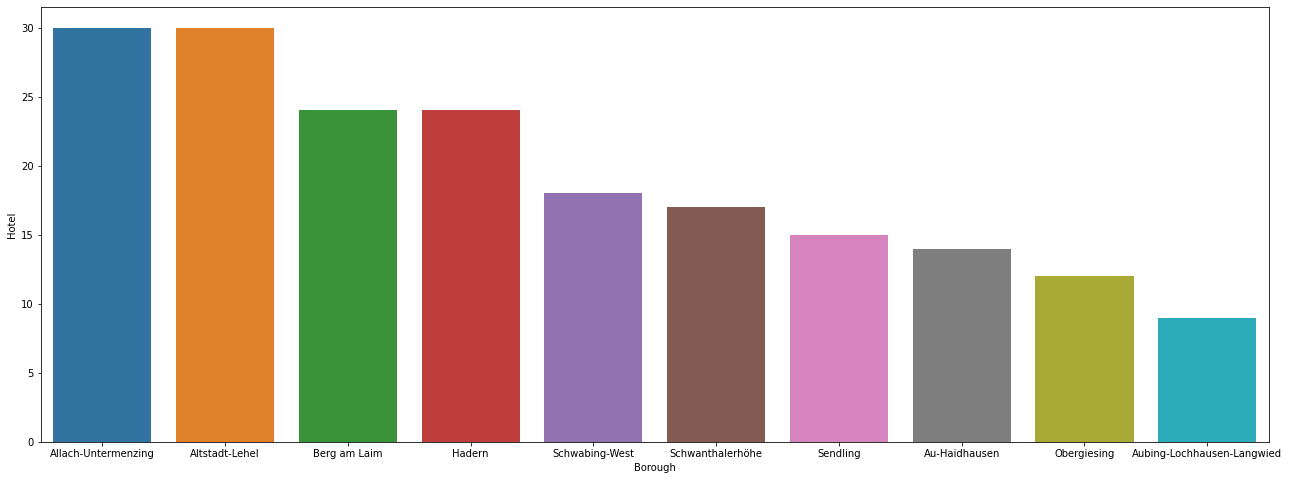

In [425]:
plt.figure(figsize=(22,8))
plt.xticks()
sns.barplot(x="Borough",y="Hotel",data=hotels_per_borough.nlargest(10,"Hotel"))

__We will narrow our analysis to the  5 Bourougs around the central area__

__Creating a new dataframe with the hotels in the ["Altstadt-Lehel","Ludwigsvorstadt-Isarvorstadt","Au-Haidhausen","Maxvorstadt","Schwanthalerhöhe"] boroughs__

In [442]:
#top_boro = hotels_per_borough.nlargest(5,"Hotel")["Borough"].tolist()
top_boro = ["Altstadt-Lehel","Ludwigsvorstadt-Isarvorstadt","Au-Haidhausen","Maxvorstadt","Schwanthalerhöhe"]

In [443]:
top_munich_hotels = pd.DataFrame(columns=munich_hotels.columns)

In [444]:
top_munich_hotels

,Borough,Borough Latitude,Borough Longitude,Hotel,Hotel Latitude,Hotel Longitude,Hotel Category


In [445]:
for borough in top_boro:
   
    top_munich_hotels= top_munich_hotels.append(munich_hotels[munich_hotels["Borough"]==borough],ignore_index=True)

In [446]:
top_munich_hotels.shape

(67, 7)

In [447]:
top_munich_hotels

,Borough,Borough Latitude,Borough Longitude,Hotel,Hotel Latitude,Hotel Longitude,Hotel Category
0,Altstadt-Lehel,48.137828,11.574582,Hotel Bayerischer Hof,48.140529,11.572938,Hotel
1,Altstadt-Lehel,48.137828,11.574582,Cortiina Hotel,48.136804,11.579450,Hotel
2,Altstadt-Lehel,48.137828,11.574582,Hotel Vier Jahreszeiten Kempinski,48.138918,11.581775,Hotel
3,Altstadt-Lehel,48.137828,11.574582,Louis Hotel,48.135792,11.575963,Hotel
4,Altstadt-Lehel,48.137828,11.574582,Mandarin Oriental Munich,48.137257,11.580779,Hotel
5,Altstadt-Lehel,48.137828,11.574582,Platzl Hotel,48.137823,11.578919,Hotel
6,Altstadt-Lehel,48.137828,11.574582,Motel One München-Sendlinger Tor,48.134738,11.566869,Hotel
7,Altstadt-Lehel,48.137828,11.574582,The Charles Hotel,48.142935,11.562526,Hotel
8,Altstadt-Lehel,48.137828,11.574582,Hotel Schlicker „Zum Goldenen Löwen“,48.135994,11.578328,Hotel
9,Altstadt-Lehel,48.137828,11.574582,Hotel Torbräu,48.135470,11.581453,Hotel


__Let's create a new map for Munich and add the hotels into it__

In [453]:
# create map of New York using latitude and longitude values
map_munich_hotels = folium.Map(location=[latitude, longitude], zoom_start=13.5)

# add markers to map
for lat, lng, Hotel,Borough in zip(top_munich_hotels['Hotel Latitude'], top_munich_hotels['Hotel Longitude'], 
                           top_munich_hotels['Hotel'],top_munich_hotels["Borough"]):
    label = '{},{}'.format(Hotel,Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich_hotels)  
    
map_munich_hotels

In [454]:
top_munich_hotels.head()

,Borough,Borough Latitude,Borough Longitude,Hotel,Hotel Latitude,Hotel Longitude,Hotel Category
0,Altstadt-Lehel,48.137828,11.574582,Hotel Bayerischer Hof,48.140529,11.572938,Hotel
1,Altstadt-Lehel,48.137828,11.574582,Cortiina Hotel,48.136804,11.579450,Hotel
2,Altstadt-Lehel,48.137828,11.574582,Hotel Vier Jahreszeiten Kempinski,48.138918,11.581775,Hotel
3,Altstadt-Lehel,48.137828,11.574582,Louis Hotel,48.135792,11.575963,Hotel
4,Altstadt-Lehel,48.137828,11.574582,Mandarin Oriental Munich,48.137257,11.580779,Hotel


__Let's drop the Hotel category column since it will not be in use__

In [455]:
top_munich_hotels.drop("Hotel Category",axis=1, inplace = True)

In [456]:
top_munich_hotels.head()

,Borough,Borough Latitude,Borough Longitude,Hotel,Hotel Latitude,Hotel Longitude
0,Altstadt-Lehel,48.137828,11.574582,Hotel Bayerischer Hof,48.140529,11.572938
1,Altstadt-Lehel,48.137828,11.574582,Cortiina Hotel,48.136804,11.579450
2,Altstadt-Lehel,48.137828,11.574582,Hotel Vier Jahreszeiten Kempinski,48.138918,11.581775
3,Altstadt-Lehel,48.137828,11.574582,Louis Hotel,48.135792,11.575963
4,Altstadt-Lehel,48.137828,11.574582,Mandarin Oriental Munich,48.137257,11.580779


__After Specifying the hotels in our scope, we start looking at the laundries within radius of 300m from each hotel__

__We found out from Foursquare API that the laudries category ID is 4bf58dd8d48988d1fc941735 and dry cleaning service category ID is 52f2ab2ebcbc57f1066b8b1d__

__Let's explore the laundries for one of the hotels__

In [457]:
categoryid= '4bf58dd8d48988d1fc941735,52f2ab2ebcbc57f1066b8b1d' # Category ID for the hotels
radius=300
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    top_munich_hotels.iloc[10,:]["Hotel Latitude"], 
    top_munich_hotels.iloc[10,:]["Hotel Longitude"], 
    radius, 
    categoryid)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=3QFYHIN5OLPS3BGPYVXZ3QZME33VJHSJEVBYPLBVENB5QLZH&client_secret=5ENN4G2RRNAIKF1G2P1MRLCTJMSGTJ5X0YJSSX3ET2HM0NRV&v=20180605&ll=48.132737720062856,11.576228804885833&radius=300&categoryId=4bf58dd8d48988d1fc941735,52f2ab2ebcbc57f1066b8b1d'

In [459]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6059aff7dfe7d41ffb8d2f9a'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'Gärtnerplatz',
  'headerFullLocation': 'Gärtnerplatz, Munich',
  'headerLocationGranularity': 'neighborhood',
  'query': 'laundry',
  'totalResults': 2,
  'suggestedBounds': {'ne': {'lat': 48.13543772276286,
    'lng': 11.580266761988325},
   'sw': {'lat': 48.13003771736285, 'lng': 11.572190847783341}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f017a7093adc8245a375bc1',
       'name': 'Textilpflege Hebestreit',
       'location': {'address': 'Corneliusstr.',
        'lat': 48.13222415754327,
        'lng': 11.57529472723225,
    

In [460]:
laundry = results['response']['groups'][0]['items']
    
nearby_laundry = json_normalize(laundry) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_laundry =nearby_laundry.loc[:, filtered_columns]

# filter the category for each row
nearby_laundry['venue.categories'] = nearby_laundry.apply(get_category_type, axis=1)

# clean columns
nearby_laundry.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_laundry.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Textilpflege Hebestreit,Laundry Service,48.132224,11.575295
1,Änderungsschneidere und Reinigungsannahme Karim,Tailor Shop,48.133457,11.579163


__Let's write a function to apply the same for all hotels__

In [461]:
def getNearbyLaundries(names, latitudes, longitudes):
    
    laundry_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius=300&categoryId={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        lat, 
        lng, 
        categoryid)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        laundry_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_laundries = pd.DataFrame([item for laundry_list in laundry_list for item in laundry_list])
    nearby_laundries.columns = ['Hotel', 
                  'Hotel Latitude', 
                  'Hotel Longitude', 
                  'Laundry', 
                  'Laundry Latitude', 
                  'Laundry Longitude', 
                  'Laundry Category']
    
    return(nearby_laundries)

In [462]:
munich_laundry = getNearbyLaundries(names=top_munich_hotels["Hotel"],
                                   latitudes=top_munich_hotels['Hotel Latitude'],
                                   longitudes=top_munich_hotels['Hotel Longitude']
                                   
                                  )

Hotel Bayerischer Hof
Cortiina Hotel
Hotel Vier Jahreszeiten Kempinski
Louis Hotel
Mandarin Oriental Munich
Platzl Hotel
Motel One München-Sendlinger Tor
The Charles Hotel
Hotel Schlicker „Zum Goldenen Löwen“
Hotel Torbräu
Deutsche Eiche
Sofitel Munich Bayerpost
Derag Livinghotel Am Viktualienmarkt
25hours Hotel The Royal Bavarian
Hotel Eder
Hotel Lux
The Flushing Meadows
Mercure Hotel München City Center
Mercure Hotel München Altstadt
Maximilian Munich Apartments & Hotel
Aloft Munich
marc münchen
Le Méridien München
The Lovelace
Hotel Olympic
EUROSTARS Book Hotel
Hotel Kraft
Hotel Metropol
Atrium Hotel München
Hotel Cocoon Hauptbahnhof
Hotel Exquisit
Motel One München-Deutsches Museum
Hotel Motel One München-Haidhausen
Residence Inn Munich City East
Hotel Mariahilf
Hilton Munich City
Hotel München Palace
Hotel Stadt Rosenheim
Hotel am Markt
Hotel Opera
Holiday Inn
City Partner Hotel Adria
Hotel Ritzi
Derag Livinghotel Am Viktualienmarkt
Novotel München City
Ruby Lilly Hotel
Hotel Euro

In [463]:
munich_laundry

,Hotel,Hotel Latitude,Hotel Longitude,Laundry,Laundry Latitude,Laundry Longitude,Laundry Category
0,Cortiina Hotel,48.136804,11.579450,Stark Reinigung,48.137173,11.580919,Dry Cleaner
1,Hotel Vier Jahreszeiten Kempinski,48.138918,11.581775,Stark Reinigung,48.137173,11.580919,Dry Cleaner
2,Louis Hotel,48.135792,11.575963,Fred Butler,48.134478,11.573124,Laundry Service
3,Mandarin Oriental Munich,48.137257,11.580779,Stark Reinigung,48.137173,11.580919,Dry Cleaner
4,Platzl Hotel,48.137823,11.578919,Stark Reinigung,48.137173,11.580919,Dry Cleaner
5,Motel One München-Sendlinger Tor,48.134738,11.566869,Die Reinigung,48.133885,11.566512,Dry Cleaner
6,The Charles Hotel,48.142935,11.562526,Textilreinigung Jaroslav,48.145132,11.560454,Laundry Service
7,Hotel Schlicker „Zum Goldenen Löwen“,48.135994,11.578328,Stark Reinigung,48.137173,11.580919,Dry Cleaner
8,Hotel Schlicker „Zum Goldenen Löwen“,48.135994,11.578328,Änderungsschneidere und Reinigungsannahme Karim,48.133457,11.579163,Tailor Shop
9,Hotel Torbräu,48.135470,11.581453,Stark Reinigung,48.137173,11.580919,Dry Cleaner


__Let's check the number of laundries withing 300m radius from the hotles__

In [464]:
munich_laundry.groupby("Hotel")["Laundry"].count()

Hotel
25hours Hotel The Royal Bavarian          1
Aloft Munich                              3
Atrium Hotel München                      3
City Partner Hotel Adria                  1
Cortiina Hotel                            1
Derag Livinghotel Am Viktualienmarkt      6
Deutsche Eiche                            2
EUROSTARS Book Hotel                      3
Eurostars Grand Central Hotel             1
Fidelio Hotel Munich                      3
Four Points by Sheraton Munich Central    2
H'Otello F'22 / München                   3
Holiday Inn                               1
Hotel Achterbahn                          2
Hotel Alfa                                1
Hotel Augustin                            1
Hotel Bavaria                             3
Hotel Cocoon Hauptbahnhof                 3
Hotel Eder                                2
Hotel Exquisit                            1
Hotel Jedermann                           1
Hotel Krone                               2
Hotel Lux                 

__Let's check how many hotels have laundries around them__

In [465]:
len(munich_laundry.groupby("Hotel")["Laundry"].count())

56

__Let's add the laundries to the map of hotel we created previously__

In [466]:
for lat, lng, Laundry in zip(munich_laundry['Laundry Latitude'], munich_laundry['Laundry Longitude'], 
                           munich_laundry['Laundry']):
    label = '{}'.format(Laundry)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich_hotels)  

In [467]:
map_munich_hotels

__Let's cerate a dataframe that contains the hotel names and the number of laundries around them__

In [468]:
laundry_hotel = munich_laundry.groupby("Hotel")["Laundry"].count().to_frame().reset_index()

In [469]:
laundry_hotel.head()

,Hotel,Laundry
0,25hours Hotel The Royal Bavarian,1
1,Aloft Munich,3
2,Atrium Hotel München,3
3,City Partner Hotel Adria,1
4,Cortiina Hotel,1


In [470]:
top_munich_hotels.head()

,Borough,Borough Latitude,Borough Longitude,Hotel,Hotel Latitude,Hotel Longitude
0,Altstadt-Lehel,48.137828,11.574582,Hotel Bayerischer Hof,48.140529,11.572938
1,Altstadt-Lehel,48.137828,11.574582,Cortiina Hotel,48.136804,11.579450
2,Altstadt-Lehel,48.137828,11.574582,Hotel Vier Jahreszeiten Kempinski,48.138918,11.581775
3,Altstadt-Lehel,48.137828,11.574582,Louis Hotel,48.135792,11.575963
4,Altstadt-Lehel,48.137828,11.574582,Mandarin Oriental Munich,48.137257,11.580779


In [471]:
top_munich_hotels_laundry = top_munich_hotels.merge(laundry_hotel,how="left",right_on="Hotel",left_on="Hotel")

In [472]:
top_munich_hotels_laundry.fillna(0,inplace=True)

In [473]:
top_munich_hotels_laundry

,Borough,Borough Latitude,Borough Longitude,Hotel,Hotel Latitude,Hotel Longitude,Laundry
0,Altstadt-Lehel,48.137828,11.574582,Hotel Bayerischer Hof,48.140529,11.572938,0.0
1,Altstadt-Lehel,48.137828,11.574582,Cortiina Hotel,48.136804,11.579450,1.0
2,Altstadt-Lehel,48.137828,11.574582,Hotel Vier Jahreszeiten Kempinski,48.138918,11.581775,1.0
3,Altstadt-Lehel,48.137828,11.574582,Louis Hotel,48.135792,11.575963,1.0
4,Altstadt-Lehel,48.137828,11.574582,Mandarin Oriental Munich,48.137257,11.580779,1.0
5,Altstadt-Lehel,48.137828,11.574582,Platzl Hotel,48.137823,11.578919,1.0
6,Altstadt-Lehel,48.137828,11.574582,Motel One München-Sendlinger Tor,48.134738,11.566869,1.0
7,Altstadt-Lehel,48.137828,11.574582,The Charles Hotel,48.142935,11.562526,1.0
8,Altstadt-Lehel,48.137828,11.574582,Hotel Schlicker „Zum Goldenen Löwen“,48.135994,11.578328,2.0
9,Altstadt-Lehel,48.137828,11.574582,Hotel Torbräu,48.135470,11.581453,3.0


## Clustering the Hotels 

In the folloiwng cells, we will do clustering on the hotels based on the available data and then we will invetigate the clusters 

__Importing Libraries__

In [474]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

we will Limit the number of columns from the top_munich_hotels_laundry dataframe and keep the columns which makes since for clustering

In [475]:
top_munich_hotels_laundry.columns

Index(['Borough', 'Borough Latitude', 'Borough Longitude', 'Hotel',
       'Hotel Latitude', 'Hotel Longitude', 'Laundry'],
      dtype='object')

In [476]:
hotels_cluster = top_munich_hotels_laundry[["Borough Latitude","Borough Longitude","Hotel Latitude","Hotel Longitude","Laundry"]]

We will use StandardScaler to scale the data

In [477]:
ss = StandardScaler()

In [478]:
hotels_cluster_scaled = ss.fit_transform(hotels_cluster)

We will use the elbow methob to determine the proper nummber of clusters

In [480]:
scores = []
for i in range(1,6):
    km = KMeans(n_clusters=i)
    km.fit(hotels_cluster_scaled)
    scores.append(km.score(hotels_cluster_scaled)) 

Text(0.5, 0, 'Number of Clusters')

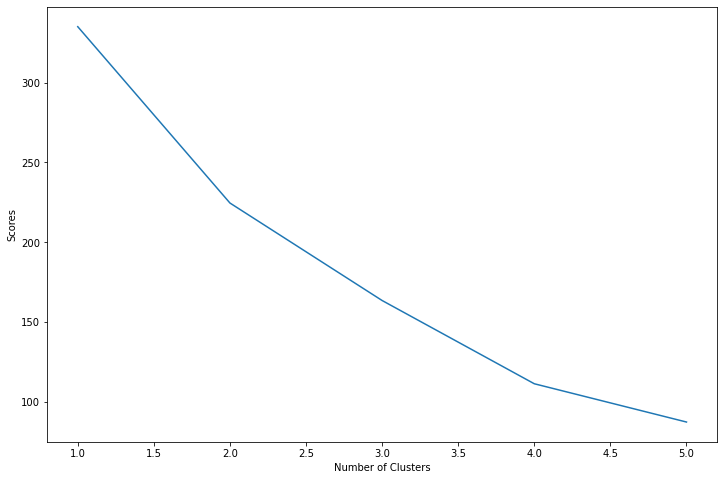

In [485]:
plt.figure(figsize=(12,8))
plt.plot(range(1,6),np.abs(scores))
plt.ylabel("Scores")
plt.xlabel("Number of Clusters")

based on the above graph, we will go with 4 clusters

In [496]:
km = KMeans(n_clusters=3)
km.fit(hotels_cluster_scaled)
labels = km.predict(hotels_cluster_scaled)

In [497]:
top_munich_hotels_laundry["Label"] = labels

Let's check the avereage number of lanudries in each cluster

In [508]:
top_munich_hotels_laundry.groupby("Label")["Laundry"].mean().to_frame()

,Laundry
Label,
0,2.117647
1,1.771429
2,1.266667


In [509]:
top_munich_hotels_laundry[top_munich_hotels_laundry["Label"]==0]

,Borough,Borough Latitude,Borough Longitude,Hotel,Hotel Latitude,Hotel Longitude,Laundry,Label
50,Schwanthalerhöhe,48.133782,11.541057,Hotel Bavaria,48.135761,11.546004,3.0,0
51,Schwanthalerhöhe,48.133782,11.541057,Four Points by Sheraton Munich Central,48.137312,11.547519,2.0,0
52,Schwanthalerhöhe,48.133782,11.541057,MEININGER Hotel Munich City Center,48.139770,11.545264,2.0,0
53,Schwanthalerhöhe,48.133782,11.541057,Hotel Jedermann,48.139018,11.550926,1.0,0
54,Schwanthalerhöhe,48.133782,11.541057,Parkhotel Theresienhöhe,48.135075,11.544694,5.0,0
55,Schwanthalerhöhe,48.133782,11.541057,Parkhotel Theresienhöhe,48.135272,11.544786,5.0,0
56,Schwanthalerhöhe,48.133782,11.541057,Westend Hotel,48.137737,11.545174,2.0,0
57,Schwanthalerhöhe,48.133782,11.541057,Hotel Augustin,48.132204,11.545641,1.0,0
58,Schwanthalerhöhe,48.133782,11.541057,Hotel Krone,48.135400,11.547527,2.0,0
59,Schwanthalerhöhe,48.133782,11.541057,Pension Margit Hotel,48.138751,11.551767,1.0,0


In [511]:
top_munich_hotels_laundry[top_munich_hotels_laundry["Label"]==1]

,Borough,Borough Latitude,Borough Longitude,Hotel,Hotel Latitude,Hotel Longitude,Laundry,Label
0,Altstadt-Lehel,48.137828,11.574582,Hotel Bayerischer Hof,48.140529,11.572938,0.0,1
1,Altstadt-Lehel,48.137828,11.574582,Cortiina Hotel,48.136804,11.579450,1.0,1
2,Altstadt-Lehel,48.137828,11.574582,Hotel Vier Jahreszeiten Kempinski,48.138918,11.581775,1.0,1
3,Altstadt-Lehel,48.137828,11.574582,Louis Hotel,48.135792,11.575963,1.0,1
4,Altstadt-Lehel,48.137828,11.574582,Mandarin Oriental Munich,48.137257,11.580779,1.0,1
5,Altstadt-Lehel,48.137828,11.574582,Platzl Hotel,48.137823,11.578919,1.0,1
6,Altstadt-Lehel,48.137828,11.574582,Motel One München-Sendlinger Tor,48.134738,11.566869,1.0,1
7,Altstadt-Lehel,48.137828,11.574582,The Charles Hotel,48.142935,11.562526,1.0,1
8,Altstadt-Lehel,48.137828,11.574582,Hotel Schlicker „Zum Goldenen Löwen“,48.135994,11.578328,2.0,1
9,Altstadt-Lehel,48.137828,11.574582,Hotel Torbräu,48.135470,11.581453,3.0,1


In [510]:
top_munich_hotels_laundry[top_munich_hotels_laundry["Label"]==2]

,Borough,Borough Latitude,Borough Longitude,Hotel,Hotel Latitude,Hotel Longitude,Laundry,Label
30,Ludwigsvorstadt-Isarvorstadt,48.130340,11.573366,Hotel Exquisit,48.134039,11.564537,1.0,2
31,Au-Haidhausen,48.128753,11.590536,Motel One München-Deutsches Museum,48.127956,11.588647,1.0,2
32,Au-Haidhausen,48.128753,11.590536,Hotel Motel One München-Haidhausen,48.125286,11.599373,4.0,2
33,Au-Haidhausen,48.128753,11.590536,Residence Inn Munich City East,48.131140,11.607928,1.0,2
34,Au-Haidhausen,48.128753,11.590536,Hotel Mariahilf,48.126712,11.583778,0.0,2
35,Au-Haidhausen,48.128753,11.590536,Hilton Munich City,48.129829,11.592548,0.0,2
36,Au-Haidhausen,48.128753,11.590536,Hotel München Palace,48.140091,11.601032,1.0,2
37,Au-Haidhausen,48.128753,11.590536,Hotel Stadt Rosenheim,48.128706,11.604450,1.0,2
38,Au-Haidhausen,48.128753,11.590536,Hotel am Markt,48.135427,11.577078,1.0,2
39,Au-Haidhausen,48.128753,11.590536,Hotel Opera,48.138817,11.587030,0.0,2


Let's represent the hotels on the map along with its assigned clusters

In [518]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=15)

# set color scheme for the clusters
x = np.arange(3)
ys = [i + x + (i*x)**2 for i in range(3)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(top_munich_hotels_laundry['Hotel Latitude'], top_munich_hotels_laundry['Hotel Longitude'],
                                  top_munich_hotels_laundry['Borough'], top_munich_hotels_laundry['Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

## Discussion

As we can see from the above analysis, hotels in cluster zero have an average of 2.117647 laundries around them. Hotels in cluster 1 have an average of 1.771429 laundries around them while hotels in cluster 2 have an average of 1.266667 landries around them. 

We can see that almost all the hotels in cluster 0 are in the Schwanthalerhöhe borugh. In addition to the higher average of the number of laundries aroung the hotels, it is not in the central area of the city. Therefore, Schwanthalerhöhe borough will not be recommended to open a laundry or provide a dry cleaning services in.

Most of the hotel in cluster 1 are located in Altstadt-Lehel borough while few of them are located in Maxvorstadt bourough. Altstadt-Lehel bourough are located in the cental area of the city and around many attraction in Munich. It is attracting a lot of the tourists and it will be a great area to open a laundry around one the hotel knowing that the average number of the layndries aroung the hotels are 1.771429. I believe that more analysis on that area should be done in order to know the chance of success.

For Hotels in cluster 2, most of the hotels are located in Au-Haidhausen borough. It is near the Altstadt-Lehel so we are assuming that people who are looking for cheaber hotels in a considerably good area. It is a good are for opening a laundry knowing that the average number of laundries around the hotels is 1.266667. We should look for an area that have multiple hotels near each other to target more number of tourists.


## Conclusion

In this notebook, we have fetched the boroughs in Munich and we extracted their coordinates. After that, we used Foursquare APIs to fetch the hotels in these borough. Next, we used Foursquare APIs to fetch the laundries aroung the hotel.

After the analysis and segemntation,the highest recommended borough to open a laundry in is Altstadt-Lehel due to the high number of hotels and nature of the area which attracts a high number of tourists. The next recommended area will be in Au-Haidhausen borough. It has a fewer number of laundries and it is relatively close to the centeral area of Altstadt-Lehel.